# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'C:\\' # 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'


# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\IDS7\\2024\\"
df_ids7 = bh_utils.import_excel_files_to_dataframe(root_folder)

# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\DoseTrack - Serienivå\\2024\\"
df_dt = bh_utils.import_excel_files_to_dataframe(root_folder)

Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-01 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-02 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-03 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-04 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-05 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-06 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-07 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-08 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-09 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-10 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-11 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-12 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\DoseTrack - Serienivå\2024\2024-01 - OUS.xlsx...
Reading C:\Users\bjor

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1530
Number of cancelled procedures: 295
Number of non-human subjects: 101
Number of rows with invalid accession number: 7
2211     NNRA000009433721
11806    NNRA000009532398
11807    NNRA000009578608
18065    NNUL000009507772
18066    NNUL000009507772
18067    NNUL000009612281
27994    NBOU000012935221
Name: Henvisnings-ID, dtype: object
Number of accession numbers in IDS7: 21339
Number of accession numbers in IDS7 not in DoseTrack: 2591
Without this column, we cannot keep track of which procedures are on the same patient.


User Guide to get the "Pasienter" column in the IDS7 data:


Note that the "Pasient column is not a column in IDS7, but must be created manually for anonymity reasons.
This can be done in excel after export to a safe location using the following met

In [3]:
# Print all unique elements in Modality Room, sorted alphabetically:
print("Unique elements in Modality Room:")
print(sorted(data['Modality Room'].unique()))

Unique elements in Modality Room:
['IRH_XA6', 'IRH_XA7', 'KRH_Elfys1', 'KRH_Elfys2', 'KRH_Elfys3', 'KRH_Elfys4', 'KRH_LAB39', 'KRH_Lab13', 'KRH_XA3', 'KRH_XA6', 'KRH_XA7', 'KRH_XA8', 'KUL_XA1', 'KUL_XA2', 'KUL_XA4', 'RAK_XA1', 'RRA_XA1', 'RRH_RF1', 'RRH_RF2', 'RRH_XA1', 'RRH_XA2', 'RRH_XA4', 'RRH_XA5', 'RUL_RF1', 'RUL_RF2', 'RUL_RF3', 'RUL_XA3', 'RUL_XA5', 'RUL_XA6', 'RUL_XA7(Stue 15)']


In [4]:
import mapping_dict_PCI as pci_dict
# Representative doser for radiologisk Rikshospital
data = data[data['Modality Room'].isin(['IRH_XA6', 'IRH_XA7', 'KRH_XA3', 'KRH_XA6', 'KRH_XA7', 'KRH_XA8','KUL_XA1', 'KUL_XA2', 'KUL_XA4'])]
import importlib
importlib.reload(pci_dict)


# Get the mapping dictionary:
mapping_dict = pci_dict.get_PCI_mapping_dict()
data = bh_map.map_procedures(data, mapping_dict, True)


Mapping procedures...

RGV Cor Mitraclip (int.) -> Mitraclip
RGA Cor TAVI (int.) -> TAVI
RGA Cor Koronarangiografi (int.) & ~RGA Cor PCI & ~RGA Cor PTSMA & ~RGA Cor ECMO & ~RGV Cor PFO & ~RGA Cor TAVI -> Koronarangiografi
RGA Cor PCI & ~RGA Cor ECMO & ~RGA Cor TAVI -> PCI
RGA Cor PTSMA (int.) & ~RGA Cor PCI -> PTSMA
RGV Cor PFO (int.) -> PFO


Reporting doses for Koronarangiografi:


Alle: n = 4903, DAP: Median - 11.1, 95% CI: [10.81 - 11.38] IQR [6.4 - 19.4], Range (0.2 - 274.7).


KRH_XA3: n =  871, DAP: Median - 12.58 (Gy*cm2), 95% CI: [11.61 - 13.46] IQR [7.2 - 21.14], Range (1.22 - 175.9).
KRH_XA6: n =  308, DAP: Median - 12.48 (Gy*cm2), 95% CI: [11.37 - 13.72] IQR [6.98 - 19.93], Range (0.98 - 106.1).
KRH_XA7: n = 1125, DAP: Median - 13.22 (Gy*cm2), 95% CI: [12.28 - 13.98] IQR [7.52 - 23.41], Range (0.25 - 274.74).
KRH_XA8: n =  750, DAP: Median - 16.0 (Gy*cm2), 95% CI: [14.83 - 17.01] IQR [9.33 - 28.18], Range (1.66 - 225.52).
KUL_XA1: n =  624, DAP: Median - 6.97 (Gy*cm2), 95% CI: [6.43 - 7.54] IQR [4.44 - 11.15], Range (0.6 - 70.38).
KUL_XA2: n =  772, DAP: Median - 8.53 (Gy*cm2), 95% CI: [8.15 - 9.01] IQR [5.44 - 13.91], Range (1.17 - 104.93).
KUL_XA4: n =  453, DAP: Median - 10.1 (Gy*cm2), 95% CI: [9.26 - 10.81] IQR [6.09 - 15.39], Range (1.11 - 125.73).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


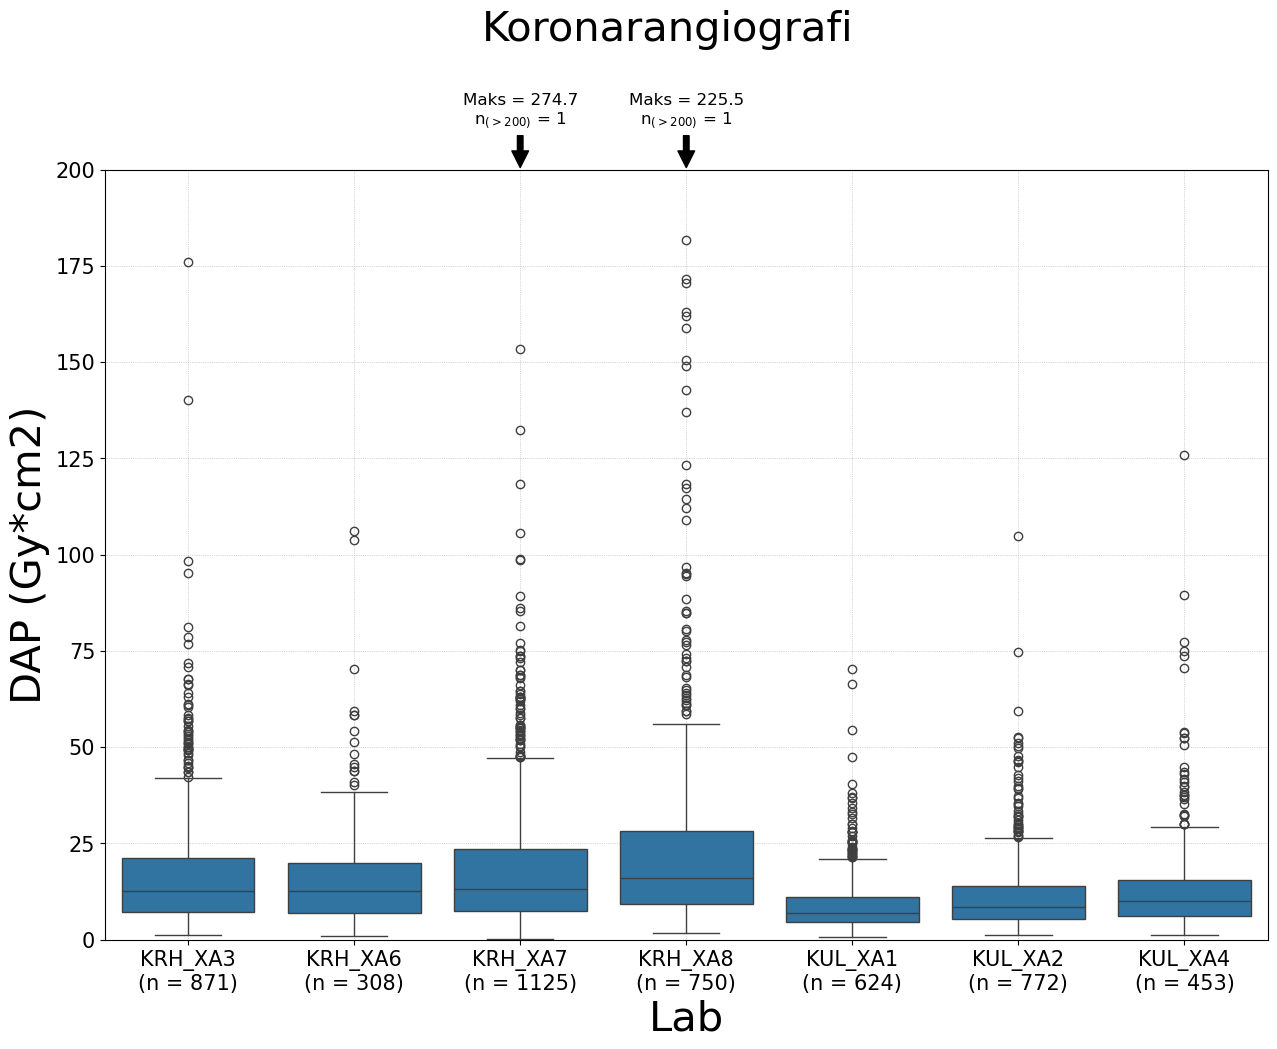

In [5]:
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for PCI:


Alle: n = 3086, DAP: Median - 29.3, 95% CI: [28.31 - 30.43] IQR [17.9 - 52.3], Range (1.2 - 505.1).


KRH_XA3: n =  266, DAP: Median - 39.4 (Gy*cm2), 95% CI: [35.18 - 43.16] IQR [21.77 - 65.71], Range (4.69 - 505.14).
KRH_XA6: n =  114, DAP: Median - 28.46 (Gy*cm2), 95% CI: [25.72 - 32.24] IQR [20.58 - 43.17], Range (6.13 - 125.38).
KRH_XA7: n =  784, DAP: Median - 36.97 (Gy*cm2), 95% CI: [34.17 - 39.81] IQR [21.07 - 63.51], Range (2.8 - 393.89).
KRH_XA8: n =  228, DAP: Median - 51.29 (Gy*cm2), 95% CI: [44.06 - 55.93] IQR [31.36 - 90.93], Range (6.18 - 405.05).
KUL_XA1: n =  641, DAP: Median - 21.14 (Gy*cm2), 95% CI: [19.77 - 22.17] IQR [14.08 - 31.92], Range (2.67 - 211.16).
KUL_XA2: n =  714, DAP: Median - 26.01 (Gy*cm2), 95% CI: [24.84 - 27.58] IQR [16.65 - 45.55], Range (1.17 - 228.15).
KUL_XA4: n =  339, DAP: Median - 29.26 (Gy*cm2), 95% CI: [26.48 - 32.3] IQR [18.78 - 51.29], Range (2.21 - 316.3).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


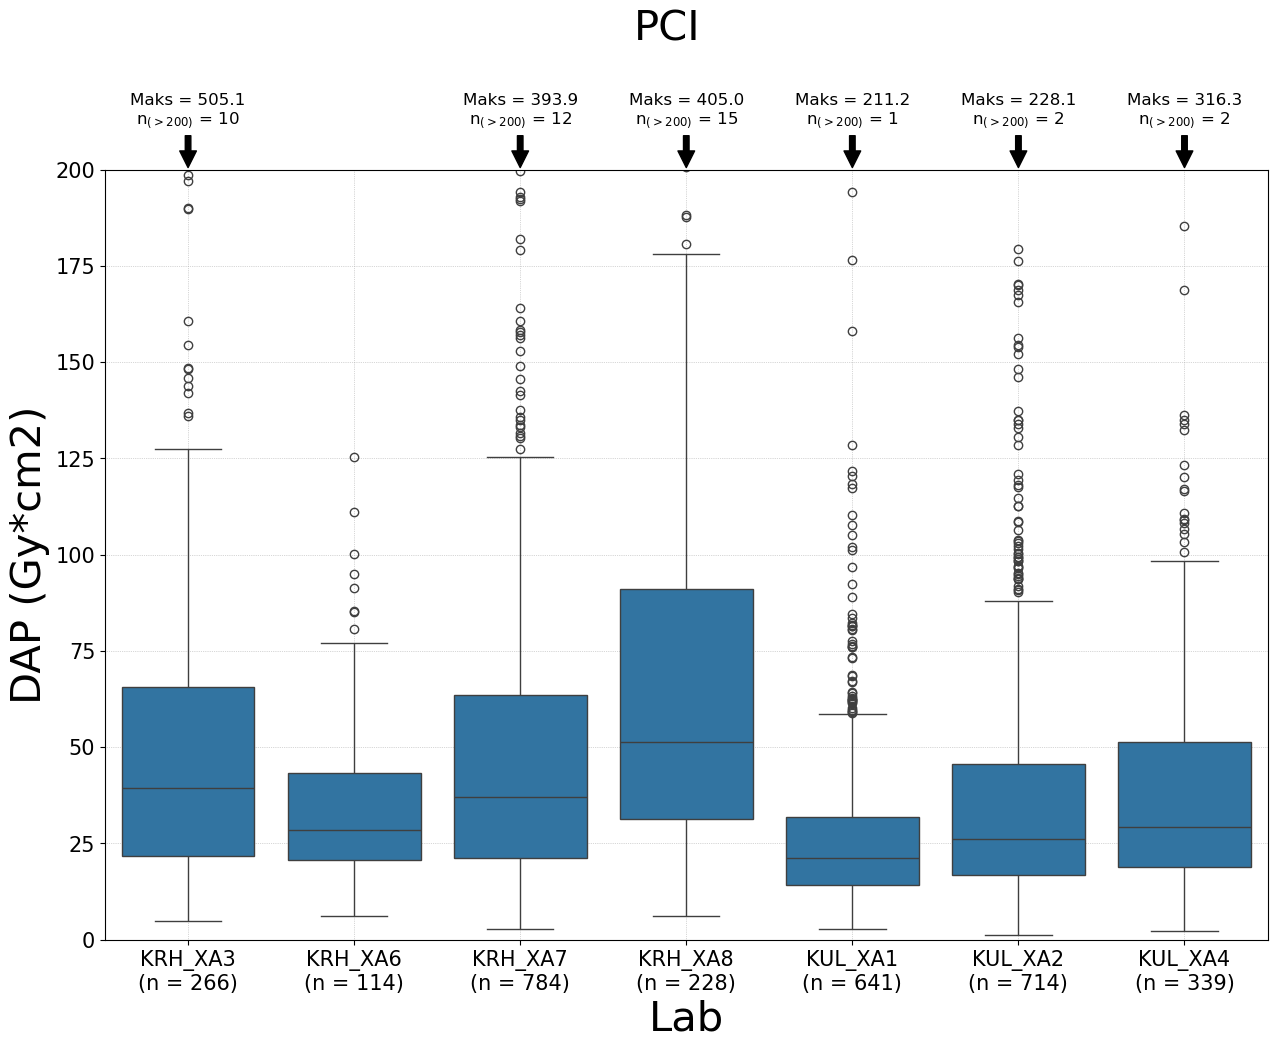

In [6]:
procedure = 'PCI'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for TAVI:


Alle: n =  738, DAP: Median - 24.3, 95% CI: [22.69 - 26.46] IQR [14.0 - 43.3], Range (0.3 - 1875.8).


IRH_XA6: n =  474, DAP: Median - 23.25 (Gy*cm2), 95% CI: [20.67 - 25.63] IQR [12.48 - 41.76], Range (0.32 - 1875.84).
IRH_XA7: n =   10, DAP: Median - 19.98 (Gy*cm2), 95% CI: [14.26 - 41.46] IQR [16.44 - 36.37], Range (8.43 - 88.59).
KRH_XA6: n =   24, DAP: Median - 17.94 (Gy*cm2), 95% CI: [11.79 - 39.74] IQR [11.3 - 41.69], Range (1.89 - 148.84).
KUL_XA1: n =  230, DAP: Median - 27.83 (Gy*cm2), 95% CI: [25.01 - 31.48] IQR [17.7 - 45.9], Range (6.61 - 261.26).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


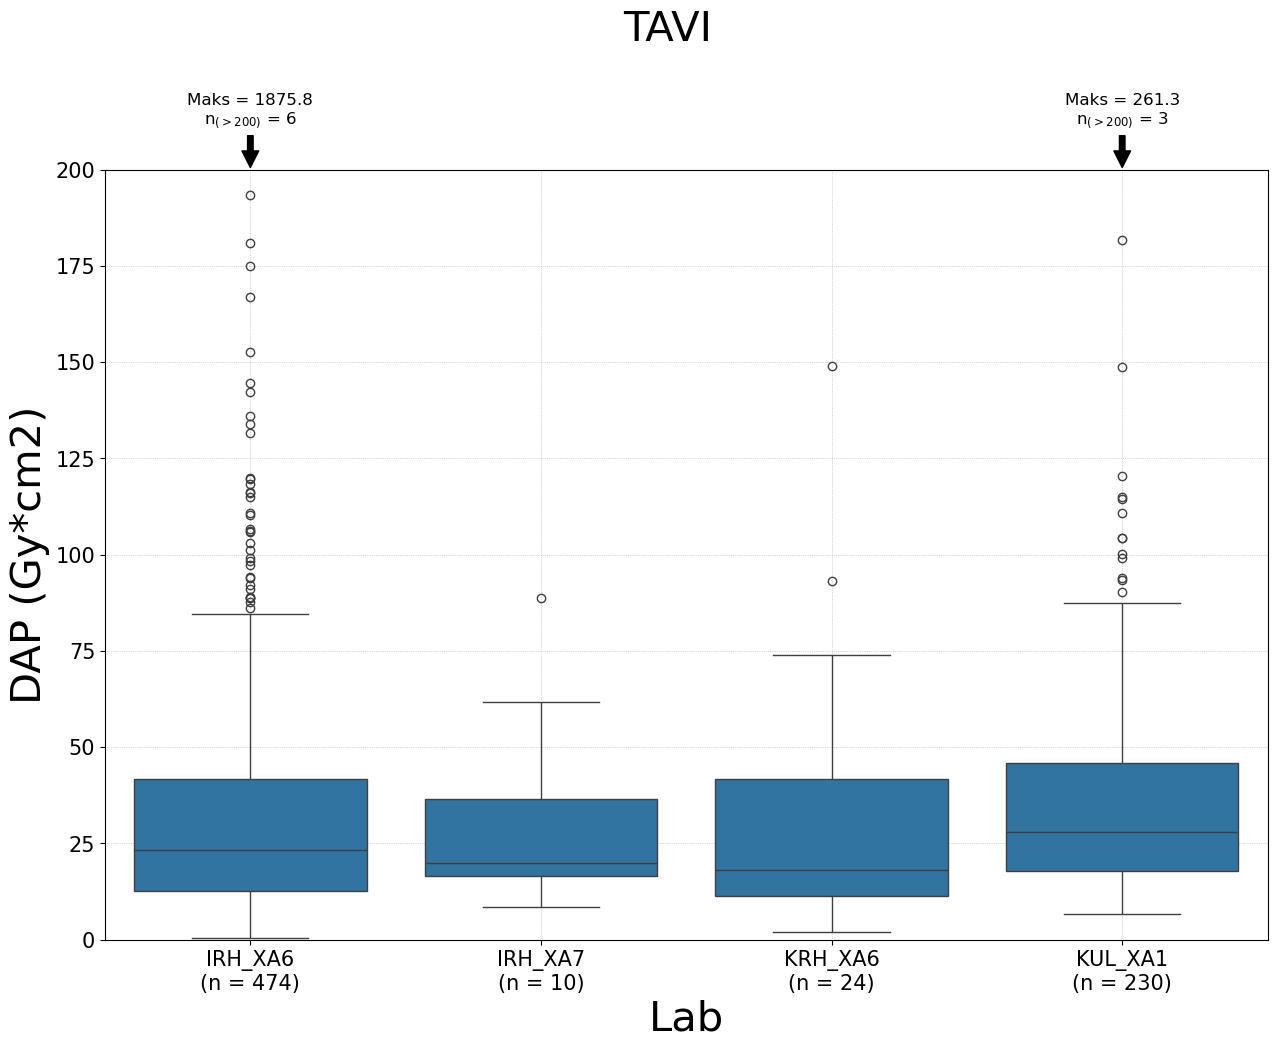

In [7]:
procedure = 'TAVI'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for Mitraclip:


Alle: n =   31, DAP: Median - 26.5, 95% CI: [19.3 - 34.06] IQR [14.3 - 42.7], Range (4.1 - 132.8).


IRH_XA6: n =    4, DAP: Median - 41.11 (Gy*cm2), 95% CI: [26.48 - 53.36] IQR [31.89 - 49.73], Range (26.48 - 53.36).
KRH_XA6: n =   27, DAP: Median - 24.49 (Gy*cm2), 95% CI: [15.39 - 34.06] IQR [12.88 - 36.8], Range (4.07 - 132.77).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


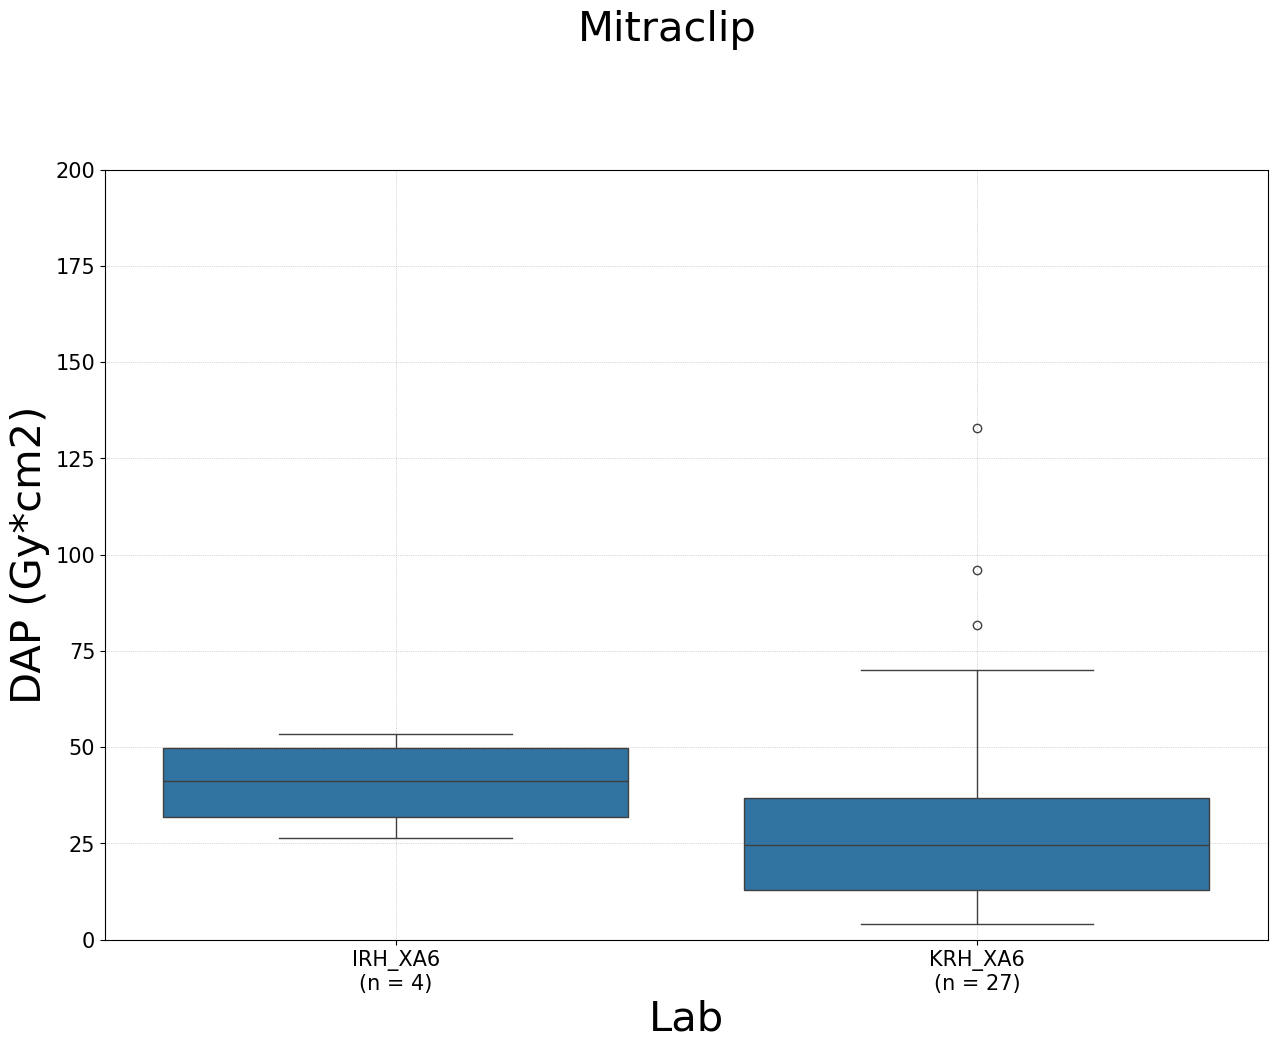

In [8]:
procedure = 'Mitraclip'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for PTSMA:


Alle: n =   40, DAP: Median - 36.8, 95% CI: [18.26 - 56.78] IQR [14.5 - 62.9], Range (0.3 - 156.7).


KRH_XA3: n =   10, DAP: Median - 27.99 (Gy*cm2), 95% CI: [14.89 - 37.98] IQR [16.18 - 36.96], Range (12.58 - 40.41).
KRH_XA6: n =    6, DAP: Median - 10.31 (Gy*cm2), 95% CI: [7.68 - 53.56] IQR [8.83 - 15.76], Range (6.79 - 89.77).
KRH_XA7: n =   19, DAP: Median - 59.81 (Gy*cm2), 95% CI: [50.98 - 64.79] IQR [34.94 - 64.84], Range (0.28 - 156.67).
KRH_XA8: n =    5, DAP: Median - 26.55 (Gy*cm2), 95% CI: [13.44 - 67.59] IQR [16.5 - 41.06], Range (13.44 - 67.59).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


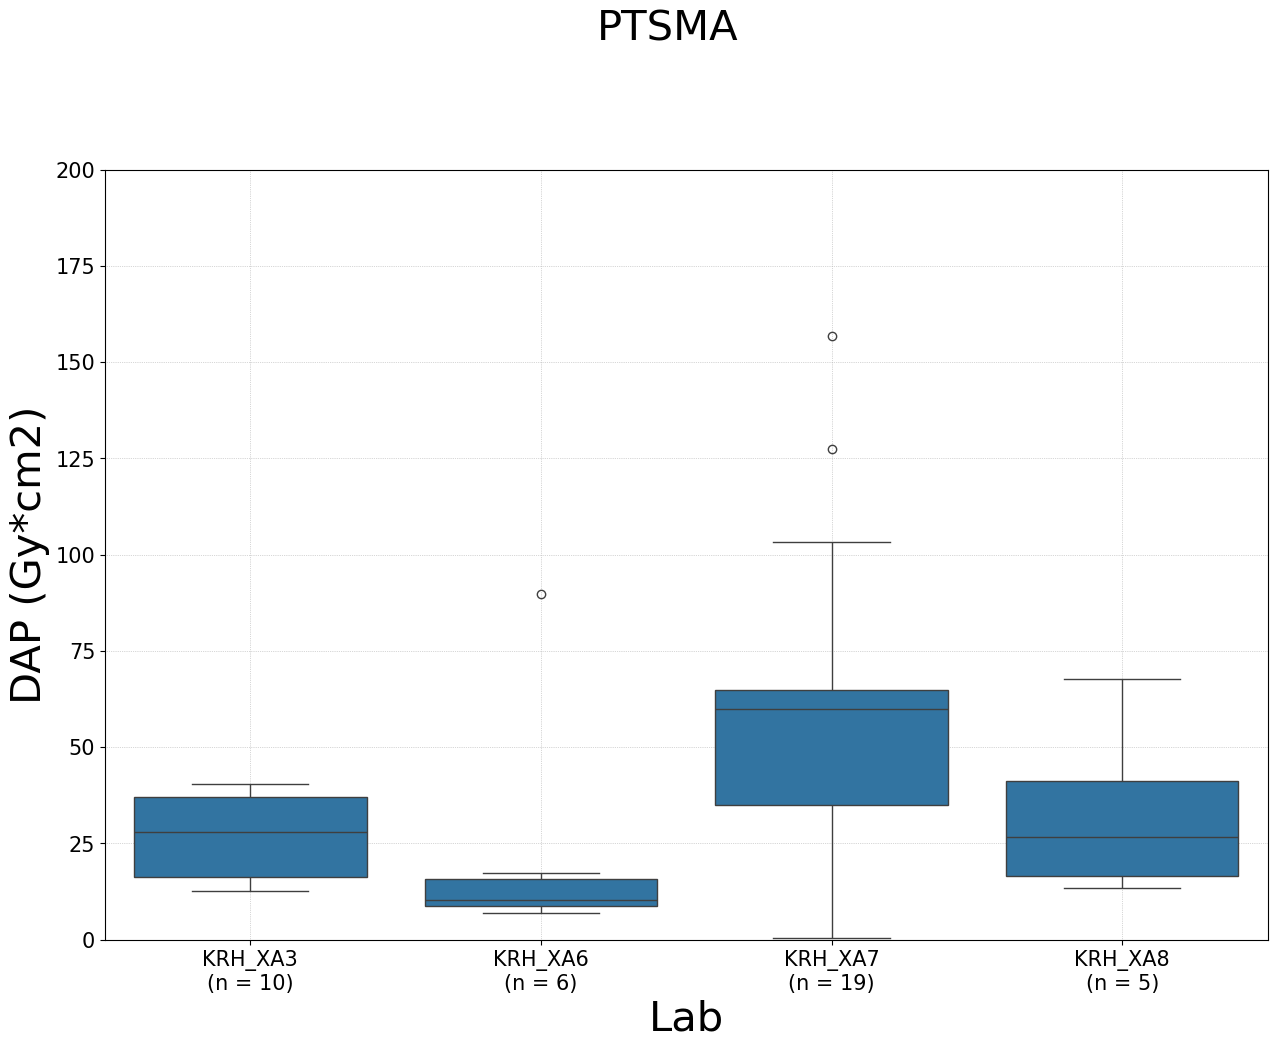

In [9]:
procedure = 'PTSMA'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for PFO:


Alle: n =  175, DAP: Median - 2.2, 95% CI: [1.86 - 2.51] IQR [1.2 - 4.0], Range (0.4 - 65.8).


KRH_XA3: n =    1, DAP: Median - 3.19 (Gy*cm2), 95% CI: [3.19 - 3.19] IQR [3.19 - 3.19], Range (3.19 - 3.19).
KRH_XA6: n =  135, DAP: Median - 2.25 (Gy*cm2), 95% CI: [1.82 - 2.56] IQR [1.21 - 4.29], Range (0.38 - 65.83).
KRH_XA7: n =    3, DAP: Median - 4.25 (Gy*cm2), 95% CI: [2.35 - 8.73] IQR [3.3 - 6.49], Range (2.35 - 8.73).
KRH_XA8: n =    3, DAP: Median - 5.14 (Gy*cm2), 95% CI: [5.08 - 14.73] IQR [5.11 - 9.94], Range (5.08 - 14.73).
KUL_XA1: n =   33, DAP: Median - 1.86 (Gy*cm2), 95% CI: [1.44 - 2.32] IQR [1.3 - 2.44], Range (0.74 - 9.0).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


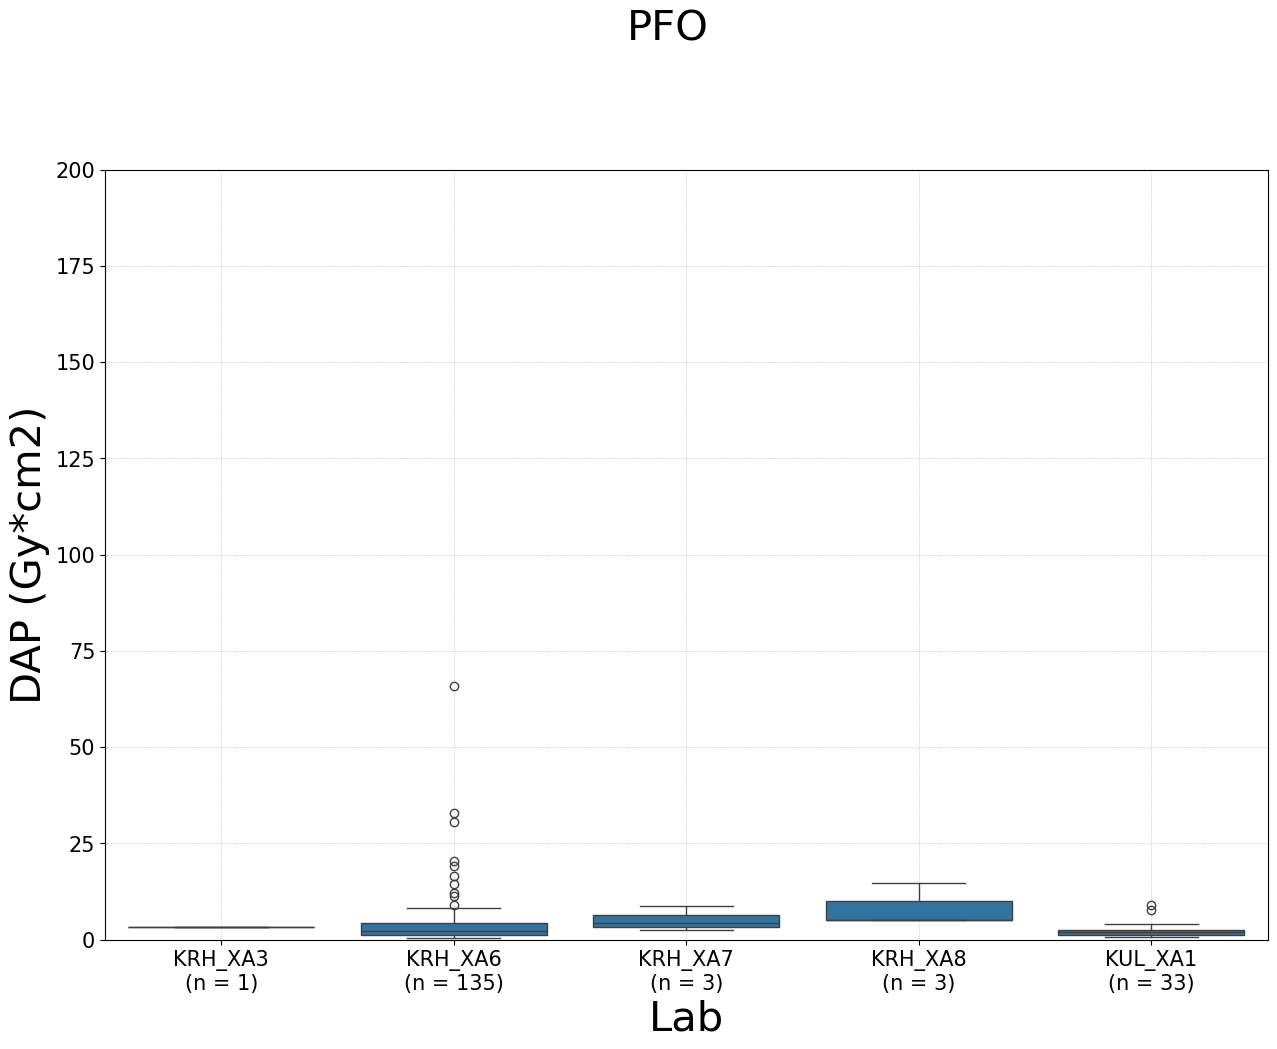

In [10]:
procedure = 'PFO'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)